In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning);

import sys
sys.executable

'/home/mingrui/anaconda3/envs/py36_cu90/bin/python'

In [2]:
import os
import glob
import shutil
from random import shuffle

# plotting
import PIL
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import Image
plt.rcParams['figure.figsize'] = [15, 15]

import deephistopath.wsi.slide as slide

import py_wsi
import py_wsi.imagepy_toolkit as tk

from wsi_utils import multiprocessing_pipeline, file_stats

import pandas as pd
pd.set_option('display.max_columns',None)

In [3]:
of_dir = '/media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells'
of_db_dir = of_dir
of_db = 'out_of_focus_db'

turtle_of = py_wsi.Turtle(of_dir, of_dir, of_db)

1 WSI found in directory.


In [4]:
print("Total WSI images:    " + str(turtle_of.num_files))
print("LMDB name:           " + str(turtle_of.db_name))
print("File names:          " + str(turtle_of.files))

Total WSI images:    1
LMDB name:           out_of_focus_db
File names:          ['1708-1.svs']


Openslide info:

Level count: 4
Level dimensions: ((63743, 55628), (15935, 13907), (3983, 3476), (1991, 1738))
Level downsamples: (1.0, 4.0000941324129276, 16.003609124741025, 32.011237276605485)
Dimensions: (63743, 55628)
Objective power: 40
Associated images:
  label: <PIL.Image.Image image mode=RGBA size=710x682 at 0x7F37DA593518>
  macro: <PIL.Image.Image image mode=RGBA size=1600x616 at 0x7F37DA5935C0>
  thumbnail: <PIL.Image.Image image mode=RGBA size=880x768 at 0x7F38777FB5C0>
Format: aperio
Properties:
  Property: aperio.AppMag, value: 40
  Property: aperio.DSR ID, value: D794XS72
  Property: aperio.Date, value: 08/26/17
  Property: aperio.DisplayColor, value: 0
  Property: aperio.Exposure Scale, value: 0.000001
  Property: aperio.Exposure Time, value: 45
  Property: aperio.Filename, value: 92218
  Property: aperio.Focus Offset, value: -0.000500
  Property: aperio.ICC Profile, value: AT2
  Property: aperio.ImageID, value: 92218
  Property: aperio.Left, value: 23.358006
  Proper

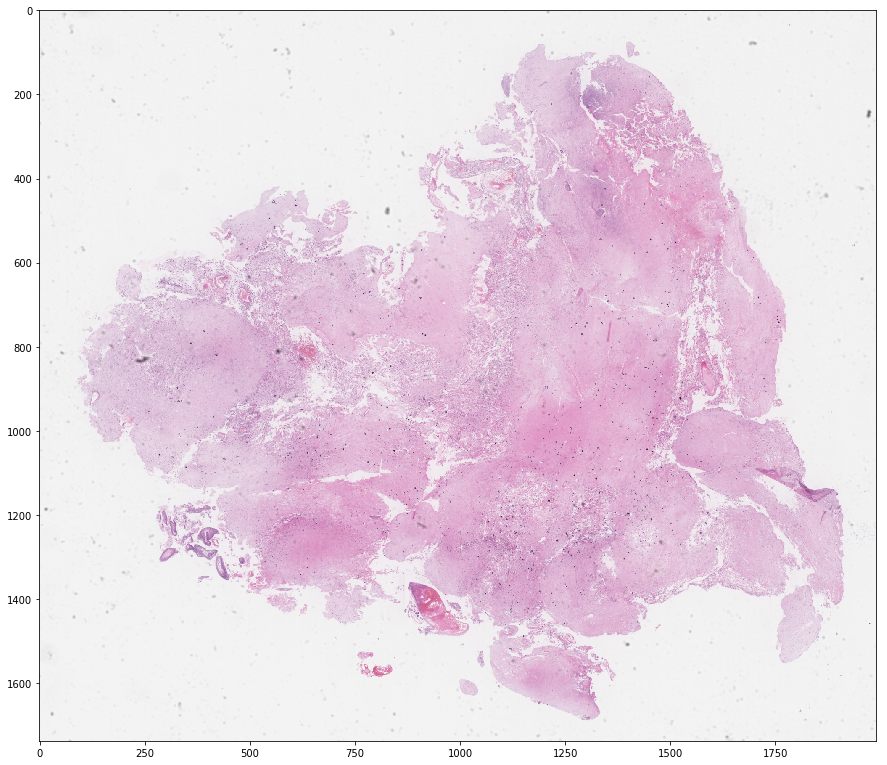

In [5]:
file_stats(of_dir, '1708-1.svs')

In [6]:
multiprocessing_pipeline(of_dir, turtle_of.files, tile_size=1024, zoom_level=0)

================START================
/media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells/1708-1.svs
Opening Slide #1: /media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells/1708-1.svs
/media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
Saving image to: /media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells/training_png/1708-1.svs-001-32x-63743x55628-1991x1738.png
Done converting slide 1
Time elapsed: 0:00:02.812209
Applying filters to images (multiprocess)

Processing slide #1
RGB                  | Time: 0:00:00.171212  Type: uint8   Shape: (1738, 1991, 3)
/media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells
Number of processes: 1
Number of training images: 1
Task #1: Process slide 1
Save Image           | Time: 0:00:01.321177  Name: /media/disk1/mingrui-projects/python-wsi-preprocessing/dead-cells/filter_png/1708-1.svs-001-001-rgb.png
Save Thumb

In [7]:
tile_df = pd.read_csv('dead-cells/tile_data/1708-1.svs-001-32x-63743x55628-1991x1738-tile_data.csv', skiprows=13)
tile_df.head()

,Tile Num,Row,Column,Tissue %,Tissue Quantity,Col Start,Row Start,Col End,Row End,Col Size,Row Size,Original Col Start,Original Row Start,Original Col End,Original Row End,Original Col Size,Original Row Size,Color Factor,S and V Factor,Quantity Factor,Score
0,1,1,1,0.0,NONE,0,0,32,32,32,32,0,0,1024,1024,1024,1024,0,0.16,0.0,0.0
1,2,1,2,0.0,NONE,32,0,64,32,32,32,1024,0,2048,1024,1024,1024,0,0.16,0.0,0.0
2,3,1,3,0.0,NONE,64,0,96,32,32,32,2049,0,3073,1024,1024,1024,0,0.16,0.0,0.0
3,4,1,4,0.0,NONE,96,0,128,32,32,32,3073,0,4097,1024,1024,1024,0,0.16,0.0,0.0
4,5,1,5,0.0,NONE,128,0,160,32,32,32,4098,0,5122,1024,1024,1024,0,0.16,0.0,0.0


In [10]:
score_df = tile_df[tile_df['Score'] > 0.5]

In [11]:
score_df.shape
score_df.head()

(172, 21)

,Tile Num,Row,Column,Tissue %,Tissue Quantity,Col Start,Row Start,Col End,Row End,Col Size,Row Size,Original Col Start,Original Row Start,Original Col End,Original Row End,Original Col Size,Original Row Size,Color Factor,S and V Factor,Quantity Factor,Score
485,486,8,45,51.56,MEDIUM,1408,224,1440,256,32,32,45078,7170,46102,8194,1024,1024,251,1.0,0.2,0.5113
548,549,9,45,59.77,MEDIUM,1408,256,1440,288,32,32,45078,8194,46102,9218,1024,1024,250,1.0,0.2,0.5841
549,550,9,46,59.96,MEDIUM,1440,256,1472,288,32,32,46102,8194,47126,9218,1024,1024,221,1.0,0.2,0.5782
609,610,10,43,62.50,MEDIUM,1344,288,1376,320,32,32,43029,9218,44053,10242,1024,1024,107,1.0,0.2,0.5487
610,611,10,44,53.42,MEDIUM,1376,288,1408,320,32,32,44053,9218,45077,10242,1024,1024,240,1.0,0.2,0.5261
